# Perceptron - from scratch -- correction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# plt.ion()

### 0.1 We provide a simple data set. 


First we show how numpy works, building only one of the 2 classes:

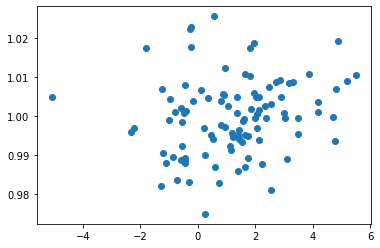

In [2]:
mu1=(1,1)
sigma1=((2, 0.01))
# points distributed according to a multi-variate Gaussian distribution : 
X1 = np.random.normal( mu1, sigma1,(100,2))  
plt.scatter(X1[:,0], X1[:,1])

Now we make another blob and stack the two blobs (classes) together

In [3]:
# data set 3
N=100
N1=N//4
N2=N-N1
D=2
np.random.seed(42)

# parameters for the 1st blob of points
mu1=(0.3,0.3)
sigma1=((1, 0.3))
X1 = np.random.normal( mu1, sigma1,(N1,D))

# parameters for the 2nd blob of points
mu2=(-1,-1)
sigma2=((2, 0.5))
X2 = np.random.normal( mu2, sigma2,(N2,D))

# the two blobs are merged, and labels  +1/-1  are assigned
Xraw = np.concatenate( (X1, X2) )
T = np.concatenate( (np.ones(N1), -np.ones(N2)) ) # .reshape(N,1)
X = Xraw.copy() # then X will be the extended vector, with the ones added

### 0.2 Preliminary: trick of the ones

It's advised to augment the dataset with ones, "as usual", to account for the bias term in a more elegant and practical way.

In [4]:
X =  np.hstack((np.ones((N,1)), X))  # extended vector

A simple plot of the 2D data (after adding the 1's)

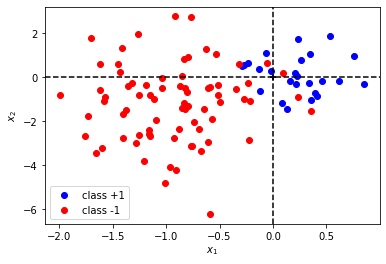

In [5]:
plt.scatter([0,0],[0,0], color='k', marker="+")
plt.axhline(0, ls="--", color='k')
plt.axvline(0, ls="--", color='k')
plt.scatter(X[0:N1,-1], X[0:N1,-2], color='b', label='class +1')
plt.scatter(X[N1:,-1], X[N1:,-2], color='red', label='class -1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.savefig("2dscatter-K=2classes.svg")

### 0.3 We help you out by providing a nice display function

It plots the data AND the hyperplane

In [6]:
def display(X,T, wparameters, iteration):
    plt.figure(1)
    W1 = X[T==-1,1:] # points of class "-1"
    W2 = X[T== 1,1:] # points of class "+1"

    ## X is assumed to be an extended vector, so 3D for 2D data,
    ## and wparameters must have as many parameters as D+1 (3 here)
    assert(X.shape[1] == wparameters.shape[0])
    
    cmap = cm.jet
    gradient=cmap(np.linspace(0.0,1.0,12))
    w0 = wparameters[0]
    A12 = wparameters[1:3]
    # length of the normal vector (defining the plane)
    norm = np.sqrt((A12**2).sum())
    # computes the closest point to the origin (in the separating plane)
    H = - w0 * A12 / (norm * norm)
    # vector along the separating line / found by rotation / rotation performed by matrix multiplication
    U = np.dot( np.array([[0, 1], [-1, 0]]) , A12) / norm
    # segment around H, of length 10
    D = np.vstack((H + 5*U, H - 5*U))

#     plt.axis([-2, 5, -2, 5])
    plt.plot(W1[:,0], W1[:,1], 'r+') # points of class "-1"
    plt.plot(W2[:,0], W2[:,1], 'bx') # points of class "+1"
    plt.plot(D[:,0], D[:,1], ls='-', color=gradient[iteration%(len(gradient))])
    # ax.set_aspect(1) # to set an aspect ratio of 1, to have a squared box


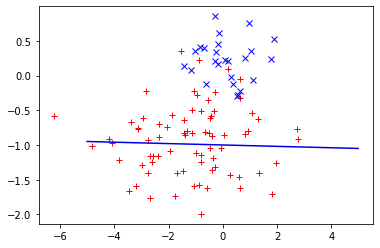

In [7]:
wparameters = np.array([1,0.01,1])
display(X,T, wparameters, 1)

## 1. Initialization

- make a stupid or random guess for an initial value of the parameters vector `wparameters`, i.e set a value for $\vec w_0=$ `w0`, the initial value of $\vec w$
- choose some values for the hyper-parameters `eta`, `MaxIter`


### Initialization of weights

It's independent of the rest, we just need to know the dimensionality of parameters to be initalized

In [8]:
def initializeWeights(X, type):
    ## data dimension
    D = X.shape[1]

    ## choice 1: deterministic
    if type=="zero":
        wparameters = np.zeros((D))
        wparameters[0] = 0.00001

    ## choice 2: uniform random centered in 0
    ##           with appropriate order of magnitude
    elif type=="random":
        wparameters = (np.random.random((D))-0.5)/D**0.5

    return wparameters

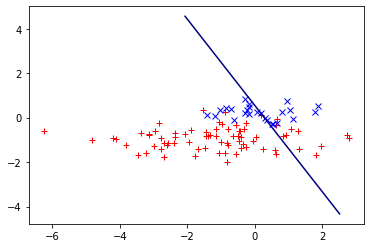

In [9]:
# number of points is obtained dynamically
N = X.shape[0]

######### initialization of the separating vector ######
w0 = initializeWeights(X,"zero")
w0[0]=1

## random ##
np.random.seed(42)
w0 = initializeWeights(X,"random")

display(X,T, w0, 0)

In [10]:
### hyper-parameters ###
MAXITER=85
eta = 0.05

### 2.0 Update steps, pen-and-paper

You should have done exercise "Perceptron – classics" by now, so **this should already be done**

Otherwise, **take a piece of paper and a pencil, and derive the update rule for the perceptron**, according to the method of Gradient Descent. Really do it on paper, not on the computer !! 

Note: we start with the perceptron using the *full batch* strategy. Variants include the *Online* strategy, or the *SGD* strategy.



### 2.1 Update steps, coding it 

- implement a function perceptronFullBatch(X,T,eta, w0, maxIter=20, plot=True)
- run it !
- add a print of the number of errors, so as to keep track of train and test error at all iterations of the algorithm (here for now we did not define a validation set, nor a test set)

If you have a hard time with python slices (boolean filters), you can first implement the stupid J2 Loss function (see slides), which has a simpler implementaiton code, because we update for all examples, whether they are corrrectly classified or not.

Test your code on the toy data set, and display your parameters (i.e. display the hyperplane, since we are in 2D)

In [11]:
X.shape, wparameters.shape, T.shape

((100, 3), (3,), (100,))

In [12]:
# a bit of trial-and-error on shapes:
(((X@ wparameters))).shape

(100,)

In [13]:
(((X@ wparameters)*T )).shape

(100,)

In [14]:
(((X@ wparameters)*T )@X).shape

(3,)

In [15]:
((X @ wparameters- T)@X).shape

(3,)

In [16]:
## minimalistic correction:
def perceptronFullBatch(X,T,eta, w0, maxIter=20, plot=None, verbose=None, Loss=None):
    N = X.shape[0]
    D = X.shape[1]
    wparameters = w0.copy()  # deep copy
    for iteration in range(maxIter):
        misClassified = ((X @ wparameters)*T  <= 0) ## array of booleans (used as a mask or filter)
        wparameters -= -eta/N * (T[misClassified]@X[misClassified]) 
    return wparameters


In [17]:
## full correction, with monitoring, displays, additional exit criterion, etc
def perceptronFullBatch(X,T,eta, w0, maxIter=20, plot=True, verbose=True, Loss="ReLU"):
    N = X.shape[0]
    D = X.shape[1]
    wparameters = w0.copy()  # deep copy

    ## the algo itself ##
    for iteration in range(maxIter):
        ## we look for misclassified examples ##
        modelValues = X @ wparameters
        XwT = (modelValues)*T          #  This is   (X @ w * T)
        misClassified = (XwT <= 0) ## array of booleans (used as a mask or filter)
        misClassifiedNumber = misClassified.sum()  ## True~1, False~0,so by summing up, we count the True's
        if misClassifiedNumber == 0:
            print("Convergence at iteration", iteration)
            if plot :
                display(X,T, wparameters, iteration)
            print(wparameters)
            return wparameters
        else: ## updating parameters ##

            if Loss=="ReLU":
               #  Rosenblatt style, but full batch:
               wparameters -= -eta/N * (T[misClassified]@X[misClassified]) 
            elif Loss=="stupidJ2":
                # following the ~stupid choice J2 of the slides instead
                wparameters -= eta/N * (modelValues - T) @ X
            else:
                print("You need to choose a Loss function!")
                return wparameters
    
            if verbose:
                print("iteration #",iteration," there are " , misClassifiedNumber, 'misclassified points => new vector', wparameters)
        if plot :
            display(X,T, wparameters, iteration)
    print("No convergence after", maxIter, "iterations.\nThere were misClassifiedNumber*100/N=",misClassifiedNumber/N*100, "% misclassified data points.")
    return wparameters




#### Note: in addition, we could monitor the loss and not just the number of errors.

iteration # 0  there are  25 misclassified points => new vector [-0.0709343   0.2488459   0.14060132]
iteration # 1  there are  25 misclassified points => new vector [-0.0694343   0.23747178  0.14726087]
iteration # 2  there are  26 misclassified points => new vector [-0.0674343   0.22628142  0.15385671]
iteration # 3  there are  25 misclassified points => new vector [-0.0649343   0.21550646  0.16003473]
iteration # 4  there are  24 misclassified points => new vector [-0.0619343   0.20579539  0.1649358 ]
iteration # 5  there are  22 misclassified points => new vector [-0.0589343   0.19662801  0.16913149]
iteration # 6  there are  22 misclassified points => new vector [-0.0559343   0.18746063  0.17332718]
iteration # 7  there are  22 misclassified points => new vector [-0.0519343   0.17946702  0.17653541]
iteration # 8  there are  21 misclassified points => new vector [-0.0484343   0.17144049  0.17962877]
iteration # 9  there are  20 misclassified points => new vector [-0.0454343   0.16

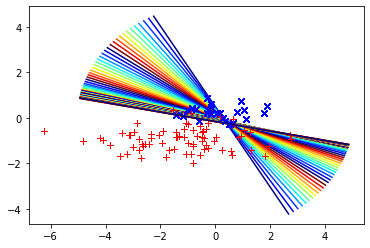

In [18]:
plotting = True
verbose = True
wparameters =  perceptronFullBatch(X,T,eta, w0, MAXITER, plotting, verbose)

### We also do it using the stupid J2 function (the one of linear regression, see the slides for the expression of J2)

And we see that it still works, on that example (it will fail later)

iteration # 0  there are  25 misclassified points => new vector [-0.07829195  0.25277715  0.15226036]
iteration # 1  there are  26 misclassified points => new vector [-0.08358695  0.24556521  0.16992166]
iteration # 2  there are  27 misclassified points => new vector [-0.08835866  0.23859729  0.18696216]
iteration # 3  there are  26 misclassified points => new vector [-0.09264275  0.23188096  0.20341496]
iteration # 4  there are  23 misclassified points => new vector [-0.09647169  0.22541951  0.21931025]
iteration # 5  there are  23 misclassified points => new vector [-0.09987525  0.21921299  0.23467573]
iteration # 6  there are  23 misclassified points => new vector [-0.10288077  0.21325893  0.24953694]
iteration # 7  there are  22 misclassified points => new vector [-0.10551354  0.20755302  0.26391755]
iteration # 8  there are  20 misclassified points => new vector [-0.107797    0.20208957  0.27783957]
iteration # 9  there are  20 misclassified points => new vector [-0.10975295  0.19

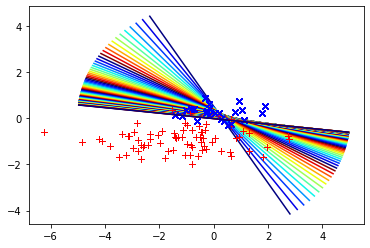

In [19]:
wparameters =  perceptronFullBatch(X,T,eta, w0, MAXITER, plotting,  verbose, Loss="stupidJ2")

### 2.2 Testing on more realistic data: MNIST (restricted to 2 classes)

Test your code on the following data set. You should be able to fully fit the train set.

Question: can you still picture the hyperplane ? Remember that we have many dimensions, but that the data consists in images.

In [20]:
## MNIST, reduced in quality (8x8 pixels pictures) ##
K=2
import sklearn.datasets
Xmnist,Tmnist = sklearn.datasets.load_digits(n_class=K, return_X_y=True)
linearPictureLength = 8 # Global variable
ratio_train = 0.6 # we may reduce this number when using mnist70 (70 000 images !)
ratio_valid = 0.3 # same here

In [21]:
Xmnist.shape, Tmnist.shape

((360, 64), (360,))

#### We show a couple of pictures and their labels

0
1
0
1
0
1
0
0
1
1


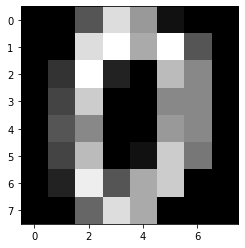

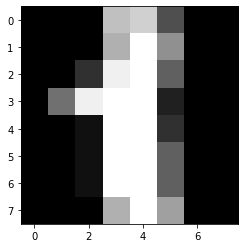

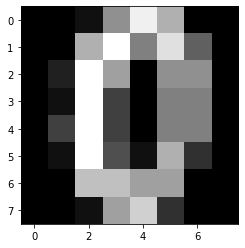

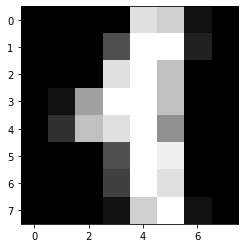

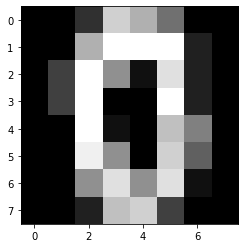

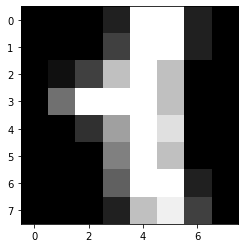

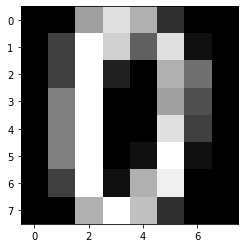

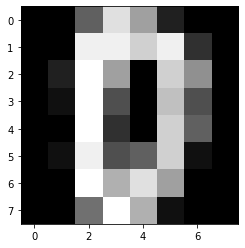

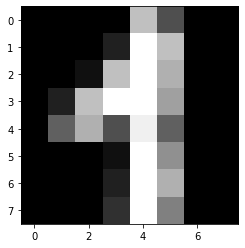

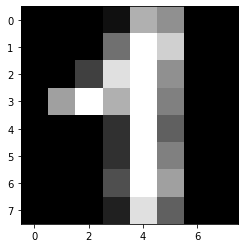

In [22]:
for n in range(10):
    plt.figure()
    plt.imshow(Xmnist[n].reshape(8, 8) , cm.gray)
    print(Tmnist[n])

#### Note that the labels are encoded as 0, 1 and not -1, 1. Is that a problem ?

In [23]:
Tmnist[:5]

array([0, 1, 0, 1, 0])

In [24]:
## TODO : do something about it !?
Tmnist*=2
Tmnist-=1

In [25]:
Tmnist[:5]

array([-1,  1, -1,  1, -1])

### is the data already augmented ? If needed, augment it.

In [26]:
N = Xmnist.shape[0]
Xmnist = np.hstack((np.ones((N,1)), Xmnist))  # extended vector

In [27]:
Xmnist[:2]

array([[ 1.,  0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15.,
        10., 15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,
         4., 12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,
         8.,  0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,
         5., 10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11.,
        16.,  9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,
         7., 15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,
         0.,  0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1.,
        16., 16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [28]:
np.random.seed(42)
w0mnist = initializeWeights(Xmnist,"random")

In [29]:
eta=0.01
MAXITER=100
plotting = False
verbose= False
wparameters =  perceptronFullBatch(Xmnist,Tmnist,eta, w0mnist, MAXITER, plotting, verbose)

Convergence at iteration 43
[-0.01478361  0.05590423  0.02874753  0.0027093  -0.06963786 -0.03636307
 -0.00656298  0.05997412  0.01254177  0.02580823 -0.0594364   0.02795181
  0.03109555 -0.01059661 -0.02535364 -0.02712995 -0.02428076  0.00468177
  0.00316993 -0.04875595  0.06401253  0.03514583 -0.03989239 -0.01715911
 -0.00544885  0.03617728 -0.03419533 -0.01942888  0.05915706  0.01596632
  0.0040893  -0.05911645 -0.05394871  0.0556774   0.03550455 -0.00988691
  0.01418199  0.01773626  0.01382352 -0.03317317 -0.04688039 -0.00059823
 -0.07047422 -0.00803561  0.00333034  0.06235285 -0.04249326 -0.02106642
  0.0057937  -0.03908899  0.05557814 -0.01731842  0.03765202  0.04794453
 -0.00696811  0.05396595 -0.04990233 -0.03770868 -0.05637983 -0.03152622
 -0.04686344 -0.02827733  0.06849709 -0.00312867 -0.02447729]


In [30]:
wparameters.shape

(65,)

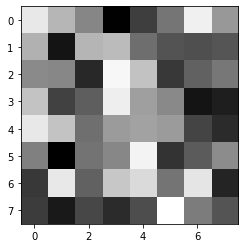

In [31]:
## we can "look" at the hyperplane, although it's 65-dimensional, 
## by looking at the 64 values that correspond to pixels, 
## and representing them as a grayscale picture (as the iamges are originally)
plt.imshow(wparameters[1:].reshape(8, 8) , cm.gray)

#### Comment:
this does not look much like anything. See below another training where it does.

Convergence at iteration 10
[-1.33391608e-02  5.59042294e-02  2.84975292e-02 -7.72073655e-02
 -1.94054526e-01  1.39980383e-02  1.62131463e-01  9.68074499e-02
  1.25417736e-02  2.58082270e-02 -8.66863972e-02 -2.96159301e-01
 -6.54334306e-03  1.21820058e-01 -5.86314224e-02 -1.76883759e-03
 -2.42807614e-02  3.62621298e-03 -1.00107848e-01 -3.31450394e-01
  3.94984755e-01  5.42229161e-01 -1.83836839e-01 -1.02964662e-01
 -5.44884785e-03  3.56495025e-02 -1.38084216e-01 -1.67401102e-01
  5.14240394e-01  5.81799653e-01 -7.86051473e-02 -2.68366453e-01
 -5.39487102e-02  5.56773985e-02 -1.17801010e-01 -1.82859128e-01
  4.24098654e-01  5.55375145e-01 -8.68709277e-02 -2.79089836e-01
 -4.68803872e-02 -5.98230674e-04 -1.68029774e-01 -2.88118941e-01
  3.38691450e-01  5.00713964e-01 -2.26687700e-01 -2.28621979e-01
  5.79369710e-03 -3.90889940e-02  3.21336936e-02 -3.08373973e-01
  6.61798012e-02  1.64805639e-01 -2.22579224e-01  1.49372544e-03
 -3.96523344e-02 -3.77086850e-02 -5.61298347e-02 -1.09720662e-

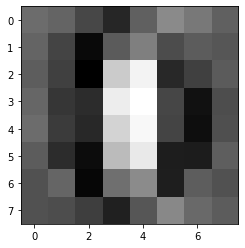

In [32]:
eta=0.1
wparameters =  perceptronFullBatch(Xmnist,Tmnist,eta, w0mnist, MAXITER, plotting, verbose)
plt.imshow(wparameters[1:].reshape(8, 8) , cm.gray)

#### Comment:
this looks a lot like a black 0 + a white 1, right ? This is not a coincidence.

### The stupid J2 algorithm fails miserably ! As expected.

In [33]:
eta=0.01
MAXITER=200
plotting = False
verbose= False
np.random.seed(42)
w0mnist = initializeWeights(Xmnist,"random")
wparameters =  perceptronFullBatch(Xmnist,Tmnist,eta, w0mnist, MAXITER, plotting, verbose, Loss="stupidJ2")

No convergence after 200 iterations.
There were misClassifiedNumber*100/N= 49.44444444444444 % misclassified data points.


### 3.1 Bonus / Homework: Re-code your algo, putting it inside a class

The class should contain an `__init__` method, a `fit` method and a `predict` method, at least. It may also include a `score` method 

### 3.2 Bonus / Homework: Compare the evolution of the hyperplane in the Online and Full-Batch strategies, on the following data set: 
- for this data set (and maybe also the one at the beggining of the TP), get an intuitive feeling of how the plane evolves over iterations, for the online perceptron and for the full batch perceptron
- which algo seems the most efficient ? (Try several initializations of $\vec w_0$).

#### Note: 
this is the data set used in exercise "2.1.2 Roseblatt’s online Perceptron"

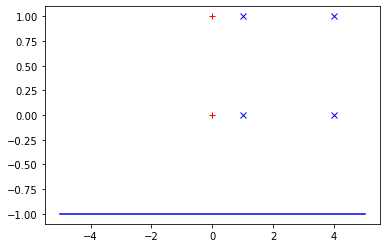

In [34]:
## data set 1
Xtoy = np.array([ [0, 0], [0, 1], [1, 0], [1, 1], [4, 0], [4, 1] ])
Ttoy = np.array([ -1 , -1 , 1 , 1 , 1 ,1])
N = Xtoy.shape[0]
Xtoy =  np.hstack((np.ones((N,1)), Xtoy))  # extended vector
wparameters_toy = np.array([1, 0.00, 1])
display(Xtoy,Ttoy, wparameters_toy, 1)

iteration # 0  there are  2 misclassified points => new vector [0.93333333 0.         0.96666667]
iteration # 1  there are  2 misclassified points => new vector [0.86666667 0.         0.93333333]
iteration # 2  there are  2 misclassified points => new vector [0.8 0.  0.9]
iteration # 3  there are  2 misclassified points => new vector [0.73333333 0.         0.86666667]
iteration # 4  there are  2 misclassified points => new vector [0.66666667 0.         0.83333333]
iteration # 5  there are  2 misclassified points => new vector [0.6 0.  0.8]
iteration # 6  there are  2 misclassified points => new vector [0.53333333 0.         0.76666667]
iteration # 7  there are  2 misclassified points => new vector [0.46666667 0.         0.73333333]
iteration # 8  there are  2 misclassified points => new vector [0.4 0.  0.7]
iteration # 9  there are  2 misclassified points => new vector [0.33333333 0.         0.66666667]
iteration # 10  there are  2 misclassified points => new vector [0.26666667 0.     

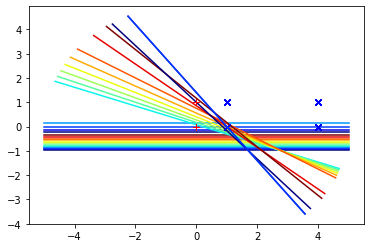

In [35]:
plotting = True
eta=0.2
MAXITER=30
wparameters =  perceptronFullBatch(Xtoy,Ttoy,eta, wparameters_toy, MAXITER, plotting)

In [36]:
## minimalistic correction:
def perceptronOnline(X,y,eta, w0, maxIter=20, plot=True):
    # get the number of points
    N = X.shape[0]
    wparameters=w0.copy()   # deep copy
    for iteration in range(maxIter):
        misClassifiedNumber = 0
        for n in range(N):
            misClassified = (wparameters @ X[n])*y[n] <= 0  # 'misClassified' is a boolean
            if misClassified == True :
                wparameters += eta*X[n]*y[n]
                misClassifiedNumber += 1
    print("No convergence after", maxIter, "epochs")
    return wparameters

In [37]:
## full correction, with monitoring, displays, additional exit criterion, etc
def perceptronOnline(X,y,eta, w0, maxIter=20, plot=True):
    # get the number of points
    N = X.shape[0]

    wparameters=w0.copy()   # deep copy
    ## the algo itself
    for iteration in range(maxIter):
        print("new epoch (1 full visit of data): ")

        misClassifiedNumber = 0
        for n in range(N):
            misClassified = (wparameters @ X[n])*y[n] <= 0  # 'misClassified' is a boolean
            if misClassified == True :
                wparameters += eta*X[n]*y[n]
                # if plot: #plotting inside each iteration inside the epoch would make lots of plots...
                #     display(X,y, wparameters, iteration)
                misClassifiedNumber += 1
                print("    new value of w:", wparameters)

        if misClassifiedNumber == 0:
            print("Convergence at epoch ", iteration)
            display(X,y, wparameters, iteration)
            return wparameters

        if plot:
            display(X,y, wparameters, iteration)
    print("No convergence after", maxIter, "epochs")
    return wparameters

new epoch (1 full visit of data): 
    new value of w: [0.8 0.  1. ]
    new value of w: [0.6 0.  0.8]
new epoch (1 full visit of data): 
    new value of w: [0.4 0.  0.8]
    new value of w: [0.2 0.  0.6]
new epoch (1 full visit of data): 
    new value of w: [5.55111512e-17 0.00000000e+00 6.00000000e-01]
    new value of w: [-0.2  0.   0.4]
    new value of w: [5.55111512e-17 2.00000000e-01 4.00000000e-01]
new epoch (1 full visit of data): 
    new value of w: [-0.2  0.2  0.4]
    new value of w: [-0.4  0.2  0.2]
    new value of w: [-0.2  0.4  0.2]
new epoch (1 full visit of data): 
    new value of w: [-4.00000000e-01  4.00000000e-01  5.55111512e-17]
new epoch (1 full visit of data): 
Convergence at epoch  5


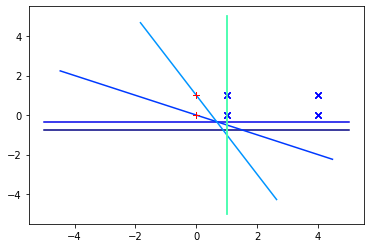

In [38]:
plotting = True
eta=0.2
MAXITER=30
wparameters =  perceptronOnline(Xtoy,Ttoy,eta, wparameters_toy, MAXITER, plotting)

new epoch (1 full visit of data): 
    new value of w: [-0.00556138  0.05590423  0.02877531  0.01223708  0.07733436  0.08733137
 -0.00481298  0.04541856  0.01254177  0.02580823 -0.05946418  0.05828514
  0.15123443  0.12432006  0.05053524 -0.03926884 -0.02428076  0.00307066
 -0.00844118  0.00410516  0.16387364  0.11528472  0.03421872 -0.01657577
 -0.00544885  0.03537172  0.03274912  0.15176556  0.17146262  0.1037441
  0.0333393  -0.04086645 -0.05394871  0.0556774   0.05775455  0.04825198
  0.13576532  0.11009737  0.05285129 -0.00742317 -0.04688039 -0.00059823
 -0.057752    0.06076995  0.13008034  0.18015841  0.03664563  0.00248913
  0.0057937  -0.03908899  0.0582448   0.04412603  0.21451313  0.20897231
  0.072143    0.05232706 -0.05104122 -0.03770868 -0.05640761 -0.02166511
  0.09619212  0.13163934  0.14077487 -0.01776756 -0.02717173]
    new value of w: [-0.01556138  0.05590423  0.02877531  0.00223708 -0.01266564 -0.06266863
 -0.11481298  0.04541856  0.01254177  0.02580823 -0.05946418 

array([-5.56138306e-03,  5.59042294e-02,  2.87753070e-02,  7.22370789e-02,
       -2.22665637e-01,  1.37331372e-01,  5.55187018e-01,  2.25418561e-01,
        1.25417736e-02,  2.58082270e-02, -4.94641750e-02, -6.17148562e-02,
       -6.87655653e-02,  3.14320058e-01,  2.10535244e-01,  3.07311624e-02,
       -2.42807614e-02,  3.07065743e-03,  1.71558818e-01, -1.75894838e-01,
        3.33873644e-01,  9.35284717e-01, -1.15781283e-01, -1.65757733e-02,
       -5.44884785e-03,  3.53717247e-02,  1.62749117e-01, -6.82344352e-02,
        5.61462617e-01,  8.23744097e-01, -8.66607028e-02, -2.20866453e-01,
       -5.39487102e-02,  5.56773985e-02, -4.22454544e-02, -2.81748017e-01,
        4.45765321e-01,  5.90097367e-01, -1.37148705e-01, -2.77423170e-01,
       -4.68803872e-02, -5.98230674e-04, -1.27751996e-01, -4.09230053e-01,
        3.50080339e-01,  2.10158408e-01, -2.93354367e-01, -1.97510868e-01,
        5.79369710e-03, -3.90889940e-02,  4.82448047e-02, -3.75873973e-01,
       -5.54868654e-02, -

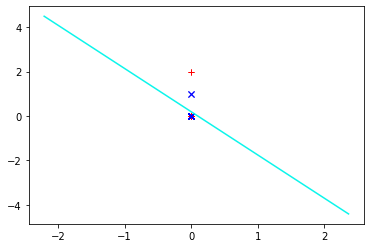

In [39]:
#trying on MNIST as well:
eta=0.01
MAXITER=100
plotting = False
verbose= False
wparameters = perceptronOnline(Xmnist,Tmnist,eta, w0mnist, MAXITER, plotting)
wparameters

### 3.3 Bonus / Homework: use sklearn to check your codes

In [40]:
import sklearn ## this line should run, at home (check it)